In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Title: Global Condom Market Trends (2015-2025)

### Description: Analyzing global condom sales and awareness trends from 2015 to 2025, highlighting market growth, consumer behavior, and regional insights.

#### Import dataset

In [2]:
df = pd.read_csv('./Rich_Global_Condom_Usage_Dataset.csv')

In [3]:
df.head()

,Year,Country,Total Sales (Million Units),Market Revenue (Million USD),Government Campaigns,Awareness Index (0-10),Most Popular Condom Type,Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD),Male vs Female Purchases (%),Brand Dominance,Sex Education Programs (Yes/No)
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,69% Male - 39% Female,Kamasutra,No
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,50% Male - 33% Female,Skyn,No
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,46% Male - 54% Female,Skyn,Yes
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,49% Male - 57% Female,Manforce,No
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,40% Male - 29% Female,Trojan,Yes


In [7]:
df.tail()

,Year,Country,Total Sales (Million Units),Market Revenue (Million USD),Government Campaigns,Awareness Index (0-10),Most Popular Condom Type,Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD),Male vs Female Purchases (%),Brand Dominance,Sex Education Programs (Yes/No)
545,2025,Australia,585,876.695845,No,5.53,Textured,77.79,52.35,89.26,20.34,0.48,52% Male - 60% Female,LifeStyles,Yes
546,2025,Australia,273,311.965966,Yes,3.43,Textured,48.71,32.15,85.71,15.77,1.96,62% Male - 41% Female,LifeStyles,No
547,2025,Australia,994,2787.762423,Yes,5.52,Textured,57.73,63.18,33.34,18.98,1.10,45% Male - 59% Female,Durex,Yes
548,2025,Australia,730,938.731002,Yes,6.73,Ultra-Thin,30.33,32.88,61.39,16.43,0.87,72% Male - 31% Female,Skyn,Yes
549,2025,Australia,1456,2914.958450,Yes,4.03,Textured,47.37,5.06,70.48,55.14,0.50,40% Male - 47% Female,Kamasutra,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  550 non-null    int64  
 1   Country                               550 non-null    object 
 2   Total Sales (Million Units)           550 non-null    int64  
 3   Market Revenue (Million USD)          550 non-null    float64
 4   Government Campaigns                  550 non-null    object 
 5   Awareness Index (0-10)                550 non-null    float64
 6   Most Popular Condom Type              550 non-null    object 
 7   Contraceptive Usage Rate (%)          550 non-null    float64
 8   Teen Pregnancy Rate (per 1000 teens)  550 non-null    float64
 9   HIV Prevention Awareness (%)          550 non-null    float64
 10  Online Sales (%)                      550 non-null    float64
 11  Average Price per C

In [9]:
df.describe()

,Year,Total Sales (Million Units),Market Revenue (Million USD),Awareness Index (0-10),Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD)
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,2020.000000,1217.850909,2460.104428,6.248382,54.625527,34.780055,62.049836,36.902309,1.360891
std,3.165156,707.861532,1908.028885,2.393678,22.865826,19.778428,21.341931,19.256040,0.664664
min,2015.000000,51.000000,34.656206,2.010000,15.020000,2.020000,25.070000,5.010000,0.200000
25%,2017.000000,599.750000,947.550178,4.065000,34.775000,17.532500,43.860000,19.565000,0.782500
50%,2020.000000,1160.000000,2002.374241,6.435000,53.920000,34.705000,63.125000,35.505000,1.390000
75%,2023.000000,1846.000000,3593.351620,8.432500,75.747500,50.787500,79.990000,52.917500,1.927500
max,2025.000000,2500.000000,8536.163259,9.980000,94.970000,69.890000,98.840000,69.960000,2.490000


In [10]:
df.isnull().sum()

Year                                    0
Country                                 0
Total Sales (Million Units)             0
Market Revenue (Million USD)            0
Government Campaigns                    0
Awareness Index (0-10)                  0
Most Popular Condom Type                0
Contraceptive Usage Rate (%)            0
Teen Pregnancy Rate (per 1000 teens)    0
HIV Prevention Awareness (%)            0
Online Sales (%)                        0
Average Price per Condom (USD)          0
Male vs Female Purchases (%)            0
Brand Dominance                         0
Sex Education Programs (Yes/No)         0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(550, 15)

In [13]:
df.dtypes

Year                                      int64
Country                                  object
Total Sales (Million Units)               int64
Market Revenue (Million USD)            float64
Government Campaigns                     object
Awareness Index (0-10)                  float64
Most Popular Condom Type                 object
Contraceptive Usage Rate (%)            float64
Teen Pregnancy Rate (per 1000 teens)    float64
HIV Prevention Awareness (%)            float64
Online Sales (%)                        float64
Average Price per Condom (USD)          float64
Male vs Female Purchases (%)             object
Brand Dominance                          object
Sex Education Programs (Yes/No)          object
dtype: object

In [14]:
df.columns

Index(['Year', 'Country', 'Total Sales (Million Units)',
       'Market Revenue (Million USD)', 'Government Campaigns',
       'Awareness Index (0-10)', 'Most Popular Condom Type',
       'Contraceptive Usage Rate (%)', 'Teen Pregnancy Rate (per 1000 teens)',
       'HIV Prevention Awareness (%)', 'Online Sales (%)',
       'Average Price per Condom (USD)', 'Male vs Female Purchases (%)',
       'Brand Dominance', 'Sex Education Programs (Yes/No)'],
      dtype='object')

## Data visualizations

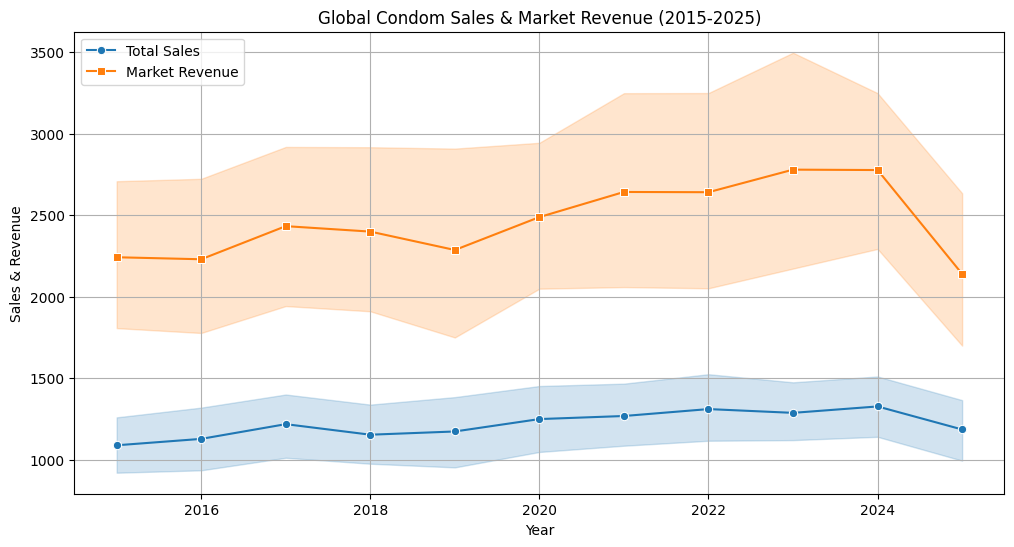

In [4]:
# Plot Sales and Revenue Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Total Sales (Million Units)", label="Total Sales", marker="o")
sns.lineplot(data=df, x="Year", y="Market Revenue (Million USD)", label="Market Revenue", marker="s")

plt.xlabel("Year")
plt.ylabel("Sales & Revenue")
plt.title("Global Condom Sales & Market Revenue (2015-2025)")
plt.legend()
plt.grid(True)
plt.show()

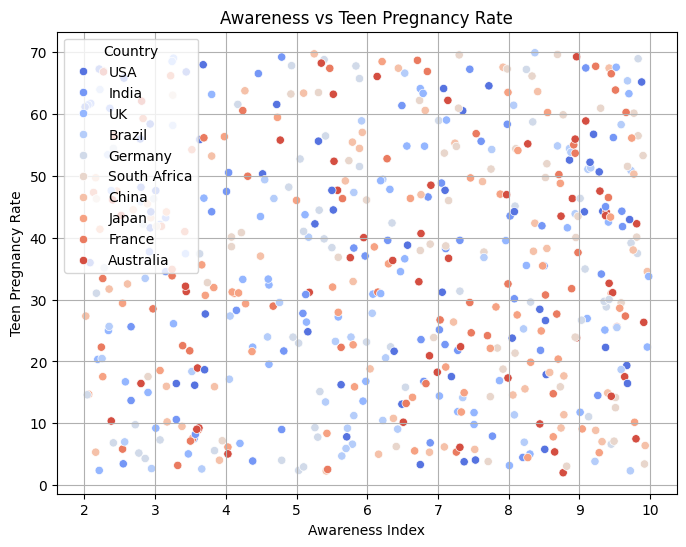

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Awareness Index (0-10)", y="Teen Pregnancy Rate (per 1000 teens)", hue="Country", palette="coolwarm")
plt.title("Awareness vs Teen Pregnancy Rate")
plt.xlabel("Awareness Index")
plt.ylabel("Teen Pregnancy Rate")
plt.grid(True)
plt.show()

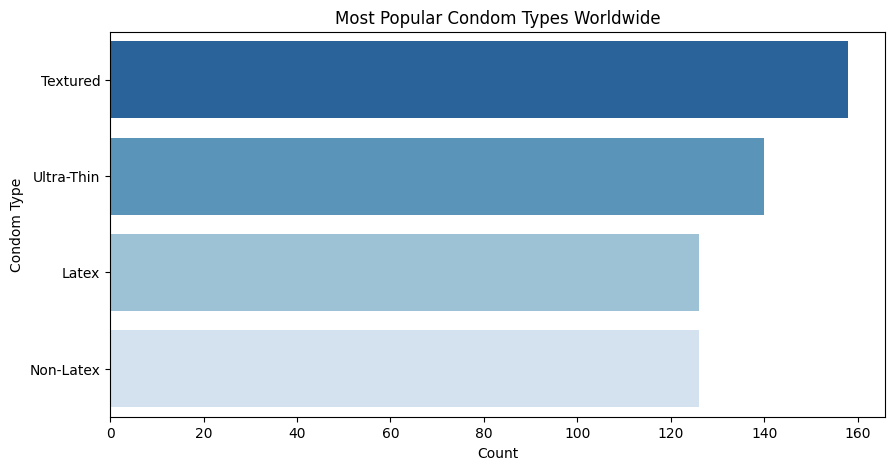

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="Most Popular Condom Type", order=df["Most Popular Condom Type"].value_counts().index, palette="Blues_r")
plt.title("Most Popular Condom Types Worldwide")
plt.xlabel("Count")
plt.ylabel("Condom Type")
plt.show()

In [ ]:
online_sales = df["Online Sales (%)"].mean()
offline_sales = 100 - online_sales

plt.figure(figsize=(6, 6))
plt.pie([online_sales, offline_sales], labels=["Online", "Offline"], autopct="%1.1f%%", colors=["skyblue", "lightcoral"])
plt.title("Online vs Offline Condom Sales")
plt.show()

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y="Brand Dominance", order=df["Brand Dominance"].value_counts().index, palette="Greens_r")
plt.title("Market Dominance of Condom Brands")
plt.xlabel("Market Share Count")
plt.ylabel("Brand")
plt.show()

In [ ]:
# Function to clean and extract percentages
def extract_percentages(value):
    try:
        male_part, female_part = value.split(" - ")
        male_percentage = float(male_part.replace("% Male", "").strip())
        female_percentage = float(female_part.replace("% Female", "").strip())
        return male_percentage, female_percentage
    except Exception as e:
        print(f"Error processing value: {value}, Error: {e}")
        return None, None

# Apply function to extract percentages
df["Male Purchases (%)"], df["Female Purchases (%)"] = zip(*df["Male vs Female Purchases (%)"].apply(extract_percentages))

# Now plot the stacked bar chart
plt.figure(figsize=(10, 5))
df.groupby("Country")[["Male Purchases (%)", "Female Purchases (%)"]].mean().plot(
    kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6)
)

plt.title("Male vs Female Condom Purchases by Country")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.legend(["Male", "Female"])
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Country", y="Contraceptive Usage Rate (%)", palette="magma")
plt.xticks(rotation=90)
plt.title("Contraceptive Usage Rate by Country")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="Sex Education Programs (Yes/No)", y="Awareness Index (0-10)", palette="pastel")
plt.title("Impact of Sex Education on Awareness Index")
plt.xlabel("Sex Education Programs")
plt.ylabel("Awareness Index")
plt.show()

## Predictive modelings

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Selecting Features and Target
target_col = "Sex Education Programs (Yes/No)"  # Example: Predicting presence of sex education
features = [col for col in df.columns if col != target_col]

In [ ]:
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

In [ ]:
X = df[features]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": GaussianNB()
}

In [ ]:
# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    results[name] = accuracy
    print(f"{name}: {accuracy:.2f}% Accuracy")

In [ ]:
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Performance Ranking:")
for model, acc in sorted_results:
    print(f"{model}: {acc:.2f}% Accuracy")

In [ ]:
# Sorting results for better visualization
sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_results.keys(), sorted_results.values(), color=["darkblue", "darkgreen", "darkred", "purple", "orange", "brown", "gray"])

# Annotate each bar with accuracy percentage
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.2f}%", ha='center', fontsize=12, fontweight="bold")

# Labels and title
plt.xlabel("ML Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Performance Ranking")
plt.ylim(0, 100)  # Ensures all percentages fit in the chart
plt.xticks(rotation=25)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## Thank you...pls upvote!!!!!